# This code assesses the outputs of VESIcal compared to the VolatileCalc parameterization of the Dixon (1997) model.  
- Test 1 compares saturation pressures from VolatileCalc and a Excel Macro with those from VESIcal for a variety of natural compositions, and synthetic arrays. 
- Test 2 compares X$_{H_{2}O}$ in the fluid phase at the saturation pressure to that outputted by the Dixon Macro, and VolatileCalc
- Test 3 compares isobars with those of VolatileCalc
- Test 4 compares degassing paths

In [1]:
import VESIcal as v
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import pandas as pd
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
plt.rcParams["font.family"] = 'arial'
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
%matplotlib inline
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})

plt.style.use("seaborn-colorblind")
#jtplot.style()
mpl.rcParams['patch.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = 1 # set the value globally

# Test 1 - Comparing saturation pressures from VESIcal to VolatileCalc and the Dixon macro

In [14]:
myfile = v.ExcelFile('Testing_Dixon_1997(VolatileCalc).xlsx',  sheet_name=0, input_type='wtpercent', norm='none')
data = myfile.data
VolatileCalc_PSat=data['VolatileCalc_P'] # Saturation pressure from VolatileCalc
DixonMacro_PSat=data['DixonMacro_P'] # Saturation pressure from dixon
satPs_wtemps_Dixon= myfile.calculate_saturation_pressure(temperature="Temp", model='Dixon')

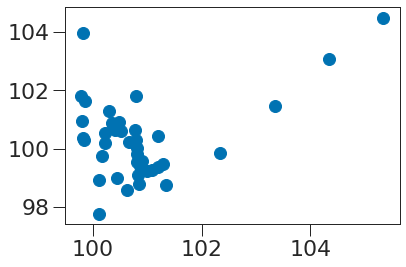

In [15]:
plt.scatter(satPs_wtemps_Dixon['Total'], 100*VolatileCalc_PSat/satPs_wtemps_Dixon['SaturationP_bars_VESIcal'])

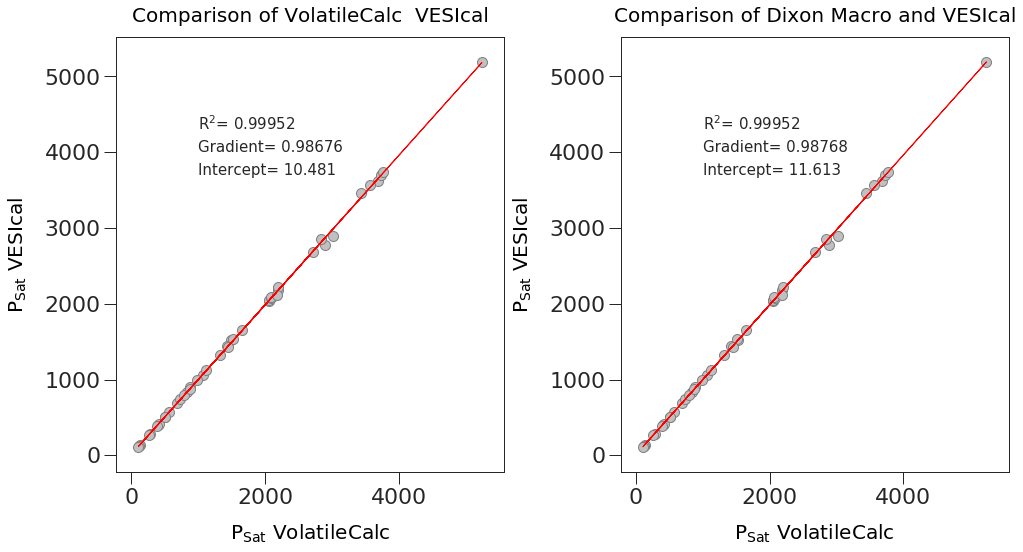

In [4]:
# Making linear regression
# VolatileCalc
X=VolatileCalc_PSat
Y=satPs_wtemps_Dixon['SaturationP_bars_VESIcal']
mask = ~np.isnan(X) & ~np.isnan(Y)
X_noNan=X[mask].values.reshape(-1, 1)
Y_noNan=Y[mask].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_pred=lr.predict(X_noNan)
#X - Y comparison of pressures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison of VolatileCalc  VESIcal',
        fontdict= font, pad = 15)
ax1.set_xlabel('P$_{Sat}$ VolatileCalc', fontdict=font, labelpad = 15)
ax1.set_ylabel('P$_{Sat}$ VESIcal', fontdict=font, labelpad = 15)
ax1.plot(X_noNan,Y_pred, color='red', linewidth=1)
ax1.scatter(X_noNan, Y_noNan,  s=100, edgecolors='gray', facecolors='silver', marker='o')
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_pred), 5)) 
#one='1:1 line'
ax1.text(1000, 3700, I, fontsize=15)
ax1.text(1000, 4000, G, fontsize=15)
ax1.text(1000, 4300, R, fontsize=15)


#Dixon Macro
X=DixonMacro_PSat
Y=satPs_wtemps_Dixon['SaturationP_bars_VESIcal']
mask = ~np.isnan(X) & ~np.isnan(Y)
X_noNan=X[mask].values.reshape(-1, 1)
Y_noNan=Y[mask].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_pred=lr.predict(X_noNan)
#X - Y comparison of pressures

ax2.set_title('Comparison of Dixon Macro and VESIcal',
        fontdict= font, pad = 15)
ax2.set_xlabel('P$_{Sat}$ VolatileCalc', fontdict=font, labelpad = 15)
ax2.set_ylabel('P$_{Sat}$ VESIcal', fontdict=font, labelpad = 15)
ax2.plot(X_noNan,Y_pred, color='red', linewidth=1)
ax2.scatter(X_noNan, Y_noNan,  s=100, edgecolors='gray', facecolors='silver', marker='o')


#plt.plot([0, 4000], [0, 4000])
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_pred), 5)) 
#one='1:1 line'
ax2.text(1000, 3700, I, fontsize=15)
ax2.text(1000, 4000, G, fontsize=15)
ax2.text(1000, 4300, R, fontsize=15)


plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.3, hspace=None)

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


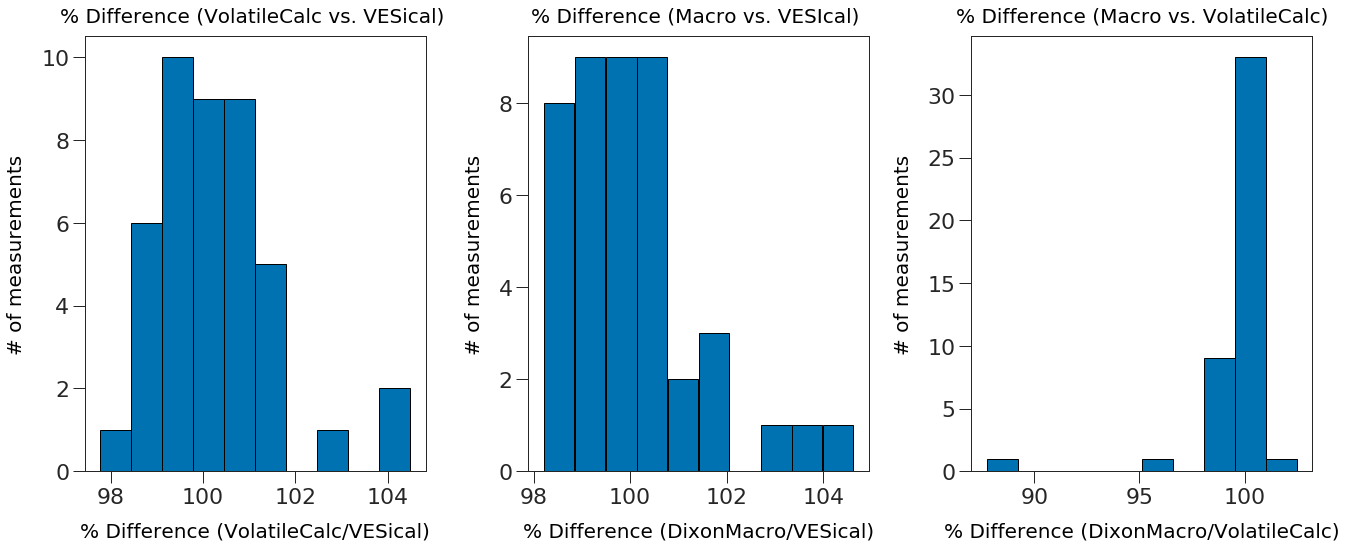

In [5]:
# This shows the % difference between VolatileCalc and VESIcal. The differences are similar in magntidue to those between VolatileCalc and the 
# Dixon Macro
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize = (22,8))
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('% Difference (VolatileCalc vs. VESical) ',
        fontdict= font, pad = 15)
ax1.set_xlabel('% Difference (VolatileCalc/VESical)', fontdict=font, labelpad = 15)
ax1.set_ylabel('# of measurements', fontdict=font, labelpad = 15)
ax1.hist(100*VolatileCalc_PSat/satPs_wtemps_Dixon['SaturationP_bars_VESIcal'])

ax2.set_title('% Difference (Macro vs. VESIcal) ',
        fontdict= font, pad = 15)
ax2.set_xlabel('% Difference (DixonMacro/VESical)', fontdict=font, labelpad = 15)
ax2.set_ylabel('# of measurements', fontdict=font, labelpad = 15)
ax2.hist(100*DixonMacro_PSat/satPs_wtemps_Dixon['SaturationP_bars_VESIcal'])

ax3.set_title('% Difference (Macro vs. VolatileCalc)',
        fontdict= font, pad = 15)
ax3.set_xlabel('% Difference (DixonMacro/VolatileCalc)', fontdict=font, labelpad = 15)
ax3.set_ylabel('# of measurements', fontdict=font, labelpad = 15)
ax3.hist(100*DixonMacro_PSat/VolatileCalc_PSat)
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.3, hspace=None)

Text(0, 0.5, 'Sat P Vesical/Sat P VolatileCalc')

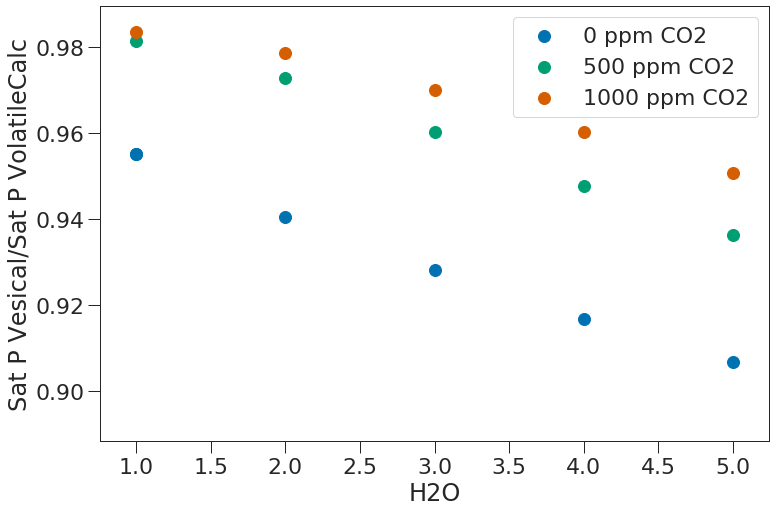

In [71]:
#Test 1b

myfile_1b = v.ExcelFile('Testing_Dixon_1997(VolatileCalc).xlsx',  sheet_name='Synthetic_NoCarbon', input_type='wtpercent')
data = myfile_1b.data
satPs_wtemps_Dixon_1b= myfile_1b.calculate_saturation_pressure(temperature=1200, model='Dixon')
fig, (ax1) = plt.subplots(figsize = (12,8))
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

plt.scatter(satPs_wtemps_Dixon_1b.loc[satPs_wtemps_Dixon_1b.CO2==0, ['H2O']].values, 
            (satPs_wtemps_Dixon_1b.loc[satPs_wtemps_Dixon_1b.CO2==0, ['SaturationP_bars_VESIcal']]).values/(satPs_wtemps_Dixon_1b.loc[satPs_wtemps_Dixon_1b.CO2==0, ['P (bars)']]).values
           ,label='0 ppm CO2')
plt.scatter(satPs_wtemps_Dixon_1b.loc[satPs_wtemps_Dixon_1b.CO2==0.05, ['H2O']].values, 
            (satPs_wtemps_Dixon_1b.loc[satPs_wtemps_Dixon_1b.CO2==0.05, ['SaturationP_bars_VESIcal']]).values/(satPs_wtemps_Dixon_1b.loc[satPs_wtemps_Dixon_1b.CO2==0.05, ['P (bars)']]).values
           ,label='500 ppm CO2')
plt.scatter(satPs_wtemps_Dixon_1b.loc[satPs_wtemps_Dixon_1b.CO2==0.1, ['H2O']].values, 
            (satPs_wtemps_Dixon_1b.loc[satPs_wtemps_Dixon_1b.CO2==0.1, ['SaturationP_bars_VESIcal']]).values/(satPs_wtemps_Dixon_1b.loc[satPs_wtemps_Dixon_1b.CO2==0.1, ['P (bars)']]).values
           ,label='1000 ppm CO2')
plt.legend()
plt.xlabel('H2O')
plt.ylabel('Sat P Vesical/Sat P VolatileCalc')

Text(0, 0.5, 'Sat P Vesical/Sat P VolatileCalc')

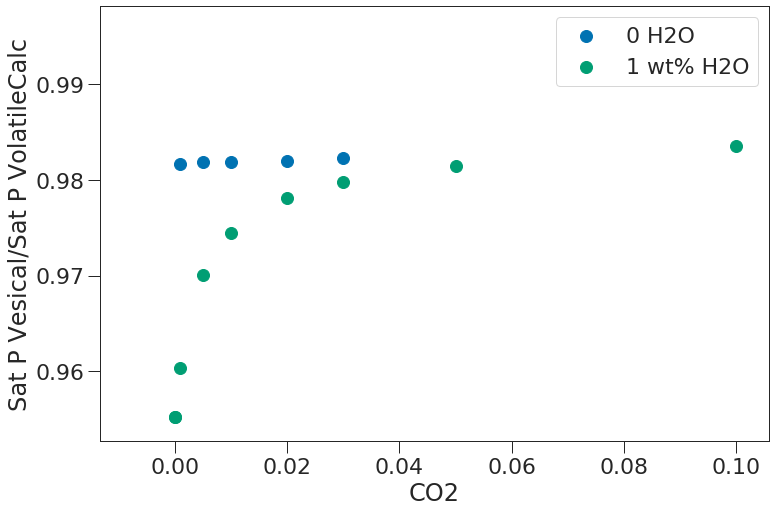

In [72]:
fig, (ax1) = plt.subplots(figsize = (12,8))
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

plt.scatter(satPs_wtemps_Dixon_1b.loc[satPs_wtemps_Dixon_1b.H2O==0, ['CO2']].values, 
            (satPs_wtemps_Dixon_1b.loc[satPs_wtemps_Dixon_1b.H2O==0, ['SaturationP_bars_VESIcal']]).values/(satPs_wtemps_Dixon_1b.loc[satPs_wtemps_Dixon_1b.H2O==0, ['P (bars)']]).values
           ,label='0 H2O')
plt.scatter(satPs_wtemps_Dixon_1b.loc[satPs_wtemps_Dixon_1b.H2O==1, ['CO2']].values, 
            (satPs_wtemps_Dixon_1b.loc[satPs_wtemps_Dixon_1b.H2O==1, ['SaturationP_bars_VESIcal']]).values/(satPs_wtemps_Dixon_1b.loc[satPs_wtemps_Dixon_1b.H2O==1, ['P (bars)']]).values
           ,label='1 wt% H2O')

plt.legend()
plt.xlabel('CO2')
plt.ylabel('Sat P Vesical/Sat P VolatileCalc')

In [ ]:
X=satPs_wtemps_Dixon_1b['P (bars)']
Y=satPs_wtemps_Dixon_1b['SaturationP_bars_VESIcal']
mask = (satPs_wtemps_Dixon_1b['CO2']>0) 
X_noNan=X[mask].values.reshape(-1, 1)
Y_noNan=Y[mask].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_pred=lr.predict(X_noNan)
#X - Y comparison of pressures
fig, ax1 = plt.subplots( figsize = (10,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison of VolatileCalc and VESIcal',
        fontdict= font, pad = 15)
ax1.set_xlabel('P$_{Sat}$ VolatileCalc', fontdict=font, labelpad = 15)
ax1.set_ylabel('P$_{Sat}$ VESIcal', fontdict=font, labelpad = 15)
ax1.plot(X_noNan,Y_pred, color='red', linewidth=1)
ax1.scatter(X_noNan, Y_noNan,  s=100, edgecolors='gray', facecolors='silver', marker='o')
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_pred), 5)) 
#one='1:1 line'
plt.plot([0, 2000], [0, 2000])
ax1.text(1000, 1000, I, fontsize=15)
ax1.text(1000, 1500, G, fontsize=15)
ax1.text(1000, 2000, R, fontsize=15)

# Test 2 - Comparing X$_{H_{2}O}$ in the fluid at the saturation pressure to that calculated using VolatileCalc and the Dixon Macro

In [ ]:
eqfluid_Dixon_VolatileCalcP = myfile.calculate_equilibrium_fluid_comp(temperature="Temp", model='Dixon', pressure = None)
eqfluid_Dixon_DixonMacroP = myfile.calculate_equilibrium_fluid_comp(temperature="Temp", model='Dixon', pressure = None)

In [ ]:
# Making linear regression
# VolatileCalc
X=0.01*eqfluid_Dixon_VolatileCalcP['VolatileCalc_H2Ov mol% (norm)'] # VolatileCalc outputs in %
Y=eqfluid_Dixon_VolatileCalcP['XH2O_fl_VESIcal']
mask = ~np.isnan(X) & ~np.isnan(Y)
X_noNan=X[mask].values.reshape(-1, 1)
Y_noNan=Y[mask].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_pred=lr.predict(X_noNan)
#X - Y comparison of pressures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16,8)) # adjust dimensions of figure here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('Comparison of X$_{H2O}$ from VolatileCalc vs. VESIcal',
        fontdict= font, pad = 15)
ax1.set_xlabel('X$_{H2O}$ VolatileCalc', fontdict=font, labelpad = 15)
ax1.set_ylabel('X$_{H2O}$ VESIcal', fontdict=font, labelpad = 15)
ax1.plot(X_noNan,Y_pred, color='red', linewidth=1)
ax1.scatter(X_noNan, Y_noNan,  s=100, edgecolors='gray', facecolors='silver', marker='o')
I='Intercept= ' + str(np.round(lr.intercept_, 3))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_pred), 5)) 

ax1.text(0.1, 0.5, I, fontsize=15)
ax1.text(0.1, 0.6, G, fontsize=15)
ax1.text(0.1, 0.7, R, fontsize=15)
# Dixon Macro
X=eqfluid_Dixon_DixonMacroP['DixonMacro_XH2O']
Y=eqfluid_Dixon_DixonMacroP['XH2O_fl_VESIcal']
mask = ~np.isnan(X) & ~np.isnan(Y)
X_noNan=X[mask].values.reshape(-1, 1)
Y_noNan=Y[mask].values.reshape(-1, 1)
lr=LinearRegression()
lr.fit(X_noNan,Y_noNan)
Y_pred=lr.predict(X_noNan)
ax2.set_title('Comparison of X$_{H2O}$ from DixonMacro vs. VESIcal',
        fontdict= font, pad = 15)
ax2.set_xlabel('X$_{H2O}$ DixonMacro', fontdict=font, labelpad = 15)
ax2.set_ylabel('X$_{H2O}$ VESIcal', fontdict=font, labelpad = 15)
ax2.plot(X_noNan,Y_pred, color='red', linewidth=1)
ax2.scatter(X_noNan, Y_noNan,  s=100, edgecolors='gray', facecolors='silver', marker='o')
I='Intercept= ' + str(np.round(lr.intercept_, 5))[1:-1]
G='Gradient= '  + str(np.round(lr.coef_, 5))[2:-2]
R='R$^2$= ' +  str(np.round(r2_score(Y_noNan, Y_pred), 5)) 

ax2.text(0.05, 0.5, I, fontsize=15)
ax2.text(0.05, 0.6, G, fontsize=15)
ax2.text(0.05, 0.7, R, fontsize=15)
plt.subplots_adjust(left=0.125, bottom=None, right=0.9, top=None, wspace=0.5, hspace=None)

# Test 3 - Comparing Isobars to those calculated in VolatileCalc

In [65]:
#Loading Isobars from VolatileCalc 
Isobar_output= pd.read_excel('Testing_Dixon_1997(VolatileCalc).xlsx', sheet_name='Isobar_Outputs', index_col=0)
myfile_Isobar_input= v.ExcelFile('Testing_Dixon_1997(VolatileCalc).xlsx',   input_type='wtpercent', sheet_name='Isobar_Comp')
data_Isobar_input = myfile_Isobar_input.data
data_Isobar_input

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,Press,Temp,Wt%H2O,PPMCO2,WtH2Om,WtOHm,Temp(¡C),P(bars),H2Ov mol%,CO2vmol%
Label,,,,,,,,,,,,,,,,,,,,,
0,49,1.130391,15.868951,0.929916,0,7.530168,0,10.055971,0,0,...,1,1200,2.238672,0.000000,0.781186,1.457486,1200,500,100.001022,0.000000
1,49,1.130391,15.868951,0.929916,0,7.530168,0,10.055971,0,0,...,1,1200,2.238672,0.000000,0.781186,1.457486,1200,500,100.001022,0.000000
2,49,1.130391,15.868951,0.929916,0,7.530168,0,10.055971,0,0,...,1,1200,2.191406,9.189453,0.750529,1.440881,1200,500,96.122349,3.881100
3,49,1.130391,15.868951,0.929916,0,7.530168,0,10.055971,0,0,...,1,1200,2.143359,18.378906,0.719809,1.423557,1200,500,92.232626,7.765975
4,49,1.130391,15.868951,0.929916,0,7.530168,0,10.055971,0,0,...,1,1200,2.094531,27.568359,0.689060,1.405481,1200,500,88.336132,11.654723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,49,1.130391,15.868951,0.929916,0,7.530168,0,10.055971,0,0,...,1,1200,2.144531,1285.429688,0.720050,1.424945,1200,3000,18.340772,81.655281
101,49,1.130391,15.868951,0.929916,0,7.530168,0,10.055971,0,0,...,1,1200,1.875781,1346.640625,0.556896,1.319311,1200,3000,14.223557,85.777142
102,49,1.130391,15.868951,0.929916,0,7.530168,0,10.055971,0,0,...,1,1200,1.571094,1407.851562,0.392243,1.179224,1200,3000,10.049169,89.954371


In [66]:
# chnage sample name to 1 to see behavoir of users enter volatiles
SampleName=0
bulk_comp= myfile_Isobar_input.get_sample_oxide_comp(SampleName)
temperature=1200

# Calculating isobars
isobars, isopleths = v.calculate_isobars_and_isopleths(sample=bulk_comp, model='Dixon',
                                            temperature=temperature,
                                            pressure_list=[500, 1000, 2000, 3000],
                                            isopleth_list=[0, 0.1, 0.2, 0.3, 0.5, 0.8, 0.9, 1],
                                            print_status=True).result

Text(0, 0.5, 'CO2')

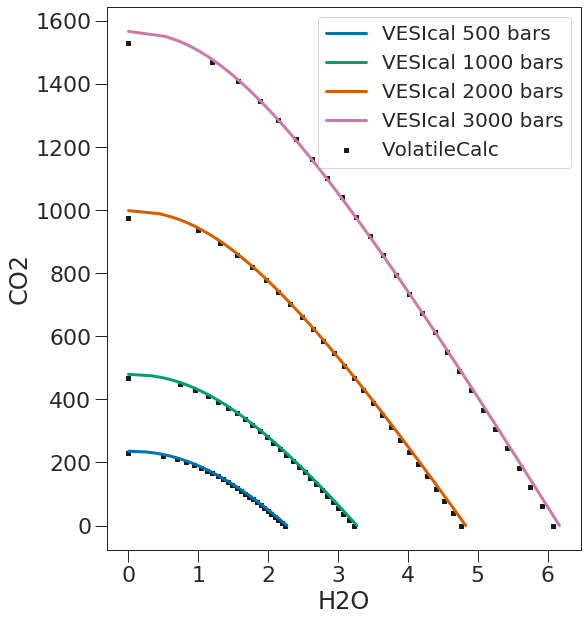

In [67]:
fig, ax1 = plt.subplots(figsize = (17/2,20/2))

plt.scatter(Isobar_output['Wt%H2O'], Isobar_output['PPMCO2'], marker='s', s=10,  label='VolatileCalc', color='k')
plt.plot(isobars.loc[isobars.Pressure==500, 'H2O_liq'], (10**4)*isobars.loc[isobars.Pressure==500, 'CO2_liq'], label='VESIcal 500 bars')
plt.plot(isobars.loc[isobars.Pressure==1000, 'H2O_liq'], (10**4)*isobars.loc[isobars.Pressure==1000, 'CO2_liq'], label='VESIcal 1000 bars')
plt.plot(isobars.loc[isobars.Pressure==2000, 'H2O_liq'], (10**4)*isobars.loc[isobars.Pressure==2000, 'CO2_liq'], label='VESIcal 2000 bars')
plt.plot(isobars.loc[isobars.Pressure==3000, 'H2O_liq'], (10**4)*isobars.loc[isobars.Pressure==3000, 'CO2_liq'], label='VESIcal 3000 bars')
plt.legend(fontsize='small')
plt.xlabel('H2O')
plt.ylabel('CO2')

In [ ]:
satPs_wtemps_Dixon_IsobarPressures= myfile_Isobar_input.calculate_saturation_pressure(temperature="Temp", model='Dixon')
satPs_wtemps_Dixon_IsobarPressure

In [ ]:
plt.scatter(satPs_wtemps_Dixon_IsobarPressures['CO2'], satPs_wtemps_Dixon_IsobarPressures['P(bars)']/satPs_wtemps_Dixon_IsobarPressures['SaturationP_bars_VESIcal'], )

In [ ]:
dissolved_noH2O=v.calculate_dissolved_volatiles(sample=bulk_comp, temperature=1200.0, pressure=3000, model='Dixon',
                                X_fluid=1, verbose=True).result
dissolved_noH2O

In [ ]:
isobars.loc[isobars.Pressure==3000, 'H2O_liq']

In [ ]:


fig, ax1 = plt.subplots(figsize = (17/2,20/2))

plt.scatter(Isobar_output['Wt%H2O'], Isobar_output['PPMCO2'], marker='d', s=10)
plt.plot(isobars.loc[isobars.Pressure==500, 'H2O_liq'], (10**4)*isobars.loc[isobars.Pressure==500, 'CO2_liq'])
plt.plot(isobars.loc[isobars.Pressure==1000, 'H2O_liq'], (10**4)*isobars.loc[isobars.Pressure==1000, 'CO2_liq'])
plt.plot(isobars.loc[isobars.Pressure==2000, 'H2O_liq'], (10**4)*isobars.loc[isobars.Pressure==2000, 'CO2_liq'])
plt.plot(isobars.loc[isobars.Pressure==3000, 'H2O_liq'], (10**4)*isobars.loc[isobars.Pressure==3000, 'CO2_liq'])